# SVM

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import math
from matplotlib import pyplot as plt

In [2]:
os.chdir("C:\\Users\\Nevena\\Desktop\\MDS Dropbox\\Machine Learning\\Projekat")

In [3]:
data=pd.read_excel("Dataset sa generatorom.xlsx", na_values="-")

In [4]:
data

,Day,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure at sea level,Average relative humidity,Total rainfall and / or snowmelt,Average visibility,Average wind speed,Maximum sustained wind speed,Maximum speed of wind,Output
0,2013-01-01,-2.8,-0.9,-4.0,1021.1,98.0,0.0,0.5,5.0,10.7,NaN,0.236121
1,2013-01-02,-1.2,5.0,-5.0,1024.2,95.0,0.0,2.6,3.1,7.2,NaN,1.675782
2,2013-01-03,3.3,8.2,-0.2,1033.7,87.0,0.0,9.2,6.3,10.7,NaN,-4.666976
3,2013-01-04,6.7,11.4,2.5,1026.0,81.0,0.0,16.3,16.7,28.7,NaN,4.681663
4,2013-01-05,6.2,9.6,2.5,1017.5,91.0,3.3,16.3,16.1,25.2,NaN,-4.167753
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2015-12-27,2.8,9.6,-1.5,1033.0,96.0,0.0,5.3,4.1,7.2,NaN,4.283422
1091,2015-12-28,0.3,2.4,-1.8,1033.1,100.0,0.0,NaN,3.5,3.5,NaN,1.477650
1092,2015-12-29,1.1,2.5,-0.8,1032.3,99.0,0.0,3.2,5.4,7.2,NaN,2.426648
1093,2015-12-30,0.3,2.1,-1.0,1035.9,92.0,0.0,11.3,8.5,10.7,NaN,2.504349


# Preprocessing

In [5]:
for i in range(len(data["Maximum temperature"])-1):
    if math.isnan(data["Maximum temperature"][i])==True:
        data.iloc[i, data.columns.get_loc("Maximum temperature")]=(data.iloc[i-1, data.columns.get_loc("Maximum temperature")]+data.iloc[i+1, data.columns.get_loc("Maximum temperature")])/2
        print(data["Maximum temperature"][i])

26.6
-4.95


In [6]:
data.iloc[1094, data.columns.get_loc("Maximum temperature")] = data.iloc[1093, data.columns.get_loc("Maximum temperature")]

In [7]:
for i in range(len(data["Minimum temperature"])-1):
    if math.isnan(data["Minimum temperature"][i])==True:
        data.iloc[i, data.columns.get_loc("Minimum temperature")]=(data.iloc[i-1, data.columns.get_loc("Minimum temperature")]+data.iloc[i+1, data.columns.get_loc("Minimum temperature")])/2
        print(data["Minimum temperature"][i])

15.0
-13.8


In [8]:
data.iloc[1094, data.columns.get_loc("Minimum temperature")] = data.iloc[1093, data.columns.get_loc("Minimum temperature")]

In [9]:
for i in range(len(data["Average Temperature"])):
    if math.isnan(data["Average Temperature"][i])==True:
        data.iloc[i, data.columns.get_loc("Average Temperature")]=(data.iloc[i, data.columns.get_loc("Minimum temperature")]+data.iloc[i, data.columns.get_loc("Maximum temperature")])/2
        print(data["Average Temperature"][i])

20.8
-9.375
0.55


In [10]:
data

,Day,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure at sea level,Average relative humidity,Total rainfall and / or snowmelt,Average visibility,Average wind speed,Maximum sustained wind speed,Maximum speed of wind,Output
0,2013-01-01,-2.80,-0.9,-4.0,1021.1,98.0,0.0,0.5,5.0,10.7,NaN,0.236121
1,2013-01-02,-1.20,5.0,-5.0,1024.2,95.0,0.0,2.6,3.1,7.2,NaN,1.675782
2,2013-01-03,3.30,8.2,-0.2,1033.7,87.0,0.0,9.2,6.3,10.7,NaN,-4.666976
3,2013-01-04,6.70,11.4,2.5,1026.0,81.0,0.0,16.3,16.7,28.7,NaN,4.681663
4,2013-01-05,6.20,9.6,2.5,1017.5,91.0,3.3,16.3,16.1,25.2,NaN,-4.167753
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2015-12-27,2.80,9.6,-1.5,1033.0,96.0,0.0,5.3,4.1,7.2,NaN,4.283422
1091,2015-12-28,0.30,2.4,-1.8,1033.1,100.0,0.0,NaN,3.5,3.5,NaN,1.477650
1092,2015-12-29,1.10,2.5,-0.8,1032.3,99.0,0.0,3.2,5.4,7.2,NaN,2.426648
1093,2015-12-30,0.30,2.1,-1.0,1035.9,92.0,0.0,11.3,8.5,10.7,NaN,2.504349


In [11]:
AtmPrSeaLevel = pd.Series(data["Atmospheric pressure at sea level"])
interpolAtmPrSeaLevel=AtmPrSeaLevel.interpolate()

In [12]:
for i in range(len(data["Atmospheric pressure at sea level"])):
    if math.isnan(data["Atmospheric pressure at sea level"][i])==True:
        data.iloc[i, data.columns.get_loc("Atmospheric pressure at sea level")]=interpolAtmPrSeaLevel[i]
        print(data["Atmospheric pressure at sea level"][i])

1010.55
1034.35
1035.9


In [13]:
AverRelHum = pd.Series(data["Average relative humidity"])
interpolAverRelHum=AverRelHum.interpolate()

In [14]:
for i in range(len(data["Average relative humidity"])):
    if math.isnan(data["Average relative humidity"][i])==True:
        data.iloc[i, data.columns.get_loc("Average relative humidity")]=interpolAverRelHum[i]
        print(data["Average relative humidity"][i])

78.0
83.0
86.0
63.5
77.0
83.0
97.0
96.0
92.0


In [15]:
TotalRainSnow = pd.Series(data["Total rainfall and / or snowmelt"])
interpolTotalRainSnow=TotalRainSnow.interpolate()

In [16]:
for i in range(len(data["Total rainfall and / or snowmelt"])):
    if math.isnan(data["Total rainfall and / or snowmelt"][i])==True:
        data.iloc[i, data.columns.get_loc("Total rainfall and / or snowmelt")]=interpolTotalRainSnow[i]
        print(data["Total rainfall and / or snowmelt"][i])

8.635
0.0
0.0


In [17]:
AverVis = pd.Series(data["Average visibility"])
interpolAverVis=AverVis.interpolate()

In [18]:
for i in range(len(data["Average visibility"])):
    if math.isnan(data["Average visibility"][i])==True:
        data.iloc[i, data.columns.get_loc("Average visibility")]=interpolAverVis[i]
        print(data["Average visibility"][i])

18.6
9.2
4.25
11.3


In [19]:
AverWindSp = pd.Series(data["Average wind speed"])
interpolAverWindSp=AverWindSp.interpolate()

In [20]:
for i in range(len(data["Average wind speed"])):
    if math.isnan(data["Average wind speed"][i])==True:
        data.iloc[i, data.columns.get_loc("Average wind speed")]=round(interpolAverWindSp[i], 2)
        print(data["Average wind speed"][i])

6.2
6.1
9.35
6.75
8.95
6.77
6.33
7.5
5.85
8.5


In [21]:
MaxSusWindSp = pd.Series(data["Maximum sustained wind speed"])
interpolMaxSusWindSp=MaxSusWindSp.interpolate()

In [22]:
for i in range(len(data["Maximum sustained wind speed"])):
    if math.isnan(data["Maximum sustained wind speed"][i])==True:
        data.iloc[i, data.columns.get_loc("Maximum sustained wind speed")]=interpolMaxSusWindSp[i]
        print(data["Maximum sustained wind speed"][i])

10.8
8.95
12.6
7.2
14.4
10.7
10.7
14.35
7.2
10.7


In [23]:
data

,Day,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure at sea level,Average relative humidity,Total rainfall and / or snowmelt,Average visibility,Average wind speed,Maximum sustained wind speed,Maximum speed of wind,Output
0,2013-01-01,-2.80,-0.9,-4.0,1021.1,98.0,0.0,0.50,5.0,10.7,NaN,0.236121
1,2013-01-02,-1.20,5.0,-5.0,1024.2,95.0,0.0,2.60,3.1,7.2,NaN,1.675782
2,2013-01-03,3.30,8.2,-0.2,1033.7,87.0,0.0,9.20,6.3,10.7,NaN,-4.666976
3,2013-01-04,6.70,11.4,2.5,1026.0,81.0,0.0,16.30,16.7,28.7,NaN,4.681663
4,2013-01-05,6.20,9.6,2.5,1017.5,91.0,3.3,16.30,16.1,25.2,NaN,-4.167753
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2015-12-27,2.80,9.6,-1.5,1033.0,96.0,0.0,5.30,4.1,7.2,NaN,4.283422
1091,2015-12-28,0.30,2.4,-1.8,1033.1,100.0,0.0,4.25,3.5,3.5,NaN,1.477650
1092,2015-12-29,1.10,2.5,-0.8,1032.3,99.0,0.0,3.20,5.4,7.2,NaN,2.426648
1093,2015-12-30,0.30,2.1,-1.0,1035.9,92.0,0.0,11.30,8.5,10.7,NaN,2.504349


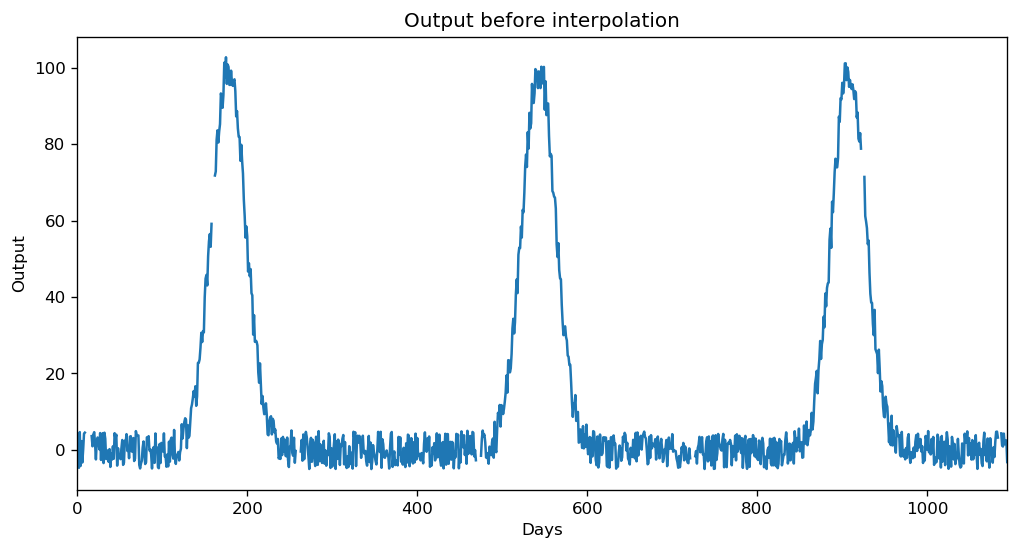

In [24]:
plt.figure(figsize=(10, 5), dpi=120)
Output = pd.Series(data["Output"])
plt.xlabel('Days')
plt.ylabel('Output')
plt.title('Output before interpolation')

Output.plot()
plt.savefig("Output before interpolation.png", dpi=120)

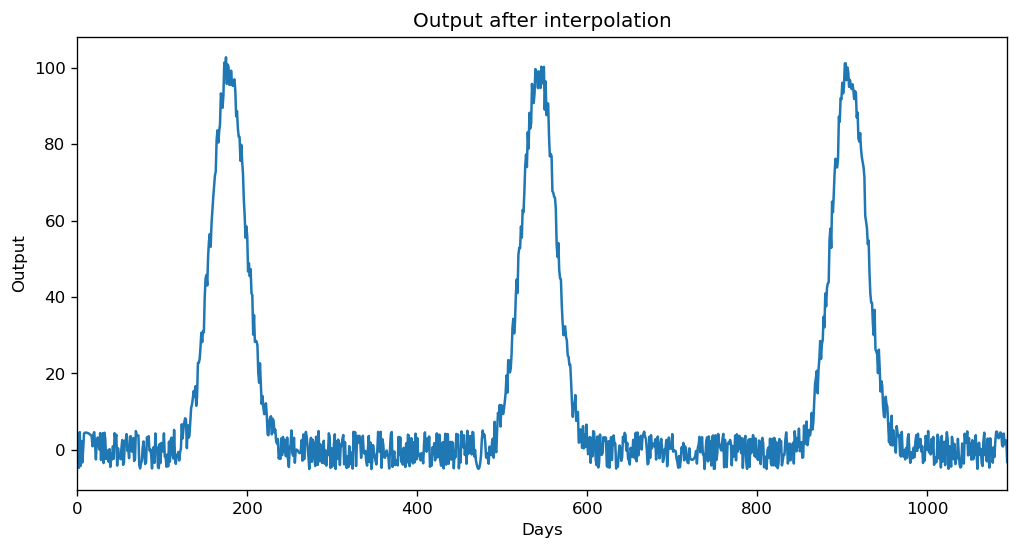

In [25]:
plt.figure(figsize=(10, 5), dpi=120)
interpolOutput=Output.interpolate(method='akima')
plt.xlabel('Days')
plt.ylabel('Output')
plt.title('Output after interpolation')

interpolOutput.plot()
plt.savefig("Output after interpolation.png", dpi=120)

In [26]:
for i in range(len(data["Output"])):
    if math.isnan(data["Output"][i])==True:
        data.iloc[i, data.columns.get_loc("Output")]=interpolOutput[i]
        print(data["Output"][i])

4.54234599377295
4.519581835427849
4.462143868682026
4.369173128843432
4.239810651220024
4.073197471119753
3.868474623850574
62.69242028329414
66.0048348896544
69.03854893819862
0.10394400305166793
-0.01854068745957327
-0.3869255559488183
-0.7432672965747376
-0.8296226034960004
-3.8037765195003237
-4.61078603213037
-4.948578692789258
-4.653223734981166
-3.560790392210276
-2.443511055718245
-2.577628975002477
-2.5665346609208264
-2.406110472110656
-2.0922387672093263
76.54077980895933
75.29864369858899
73.9522197292522
3.067448111322931
3.841837774859112
4.592643840898933


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from scipy import stats 

In [28]:
np.median(data["Output"])

2.122951543986438

In [29]:
np.mean(data["Output"])

13.64508631620363

In [30]:
stats.mode(data["Output"])

ModeResult(mode=array([-4.9949617]), count=array([1]))

In [31]:
data["Discrete output"]=np.where(data["Output"]<15, 0, 1)

In [32]:
data

,Day,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure at sea level,Average relative humidity,Total rainfall and / or snowmelt,Average visibility,Average wind speed,Maximum sustained wind speed,Maximum speed of wind,Output,Discrete output
0,2013-01-01,-2.80,-0.9,-4.0,1021.1,98.0,0.0,0.50,5.0,10.7,NaN,0.236121,0
1,2013-01-02,-1.20,5.0,-5.0,1024.2,95.0,0.0,2.60,3.1,7.2,NaN,1.675782,0
2,2013-01-03,3.30,8.2,-0.2,1033.7,87.0,0.0,9.20,6.3,10.7,NaN,-4.666976,0
3,2013-01-04,6.70,11.4,2.5,1026.0,81.0,0.0,16.30,16.7,28.7,NaN,4.681663,0
4,2013-01-05,6.20,9.6,2.5,1017.5,91.0,3.3,16.30,16.1,25.2,NaN,-4.167753,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2015-12-27,2.80,9.6,-1.5,1033.0,96.0,0.0,5.30,4.1,7.2,NaN,4.283422,0
1091,2015-12-28,0.30,2.4,-1.8,1033.1,100.0,0.0,4.25,3.5,3.5,NaN,1.477650,0
1092,2015-12-29,1.10,2.5,-0.8,1032.3,99.0,0.0,3.20,5.4,7.2,NaN,2.426648,0
1093,2015-12-30,0.30,2.1,-1.0,1035.9,92.0,0.0,11.30,8.5,10.7,NaN,2.504349,0


# Splitting data set 

In [33]:
X = data.drop(["Day","Maximum speed of wind","Output", "Discrete output"], axis=1)

In [34]:
X

,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure at sea level,Average relative humidity,Total rainfall and / or snowmelt,Average visibility,Average wind speed,Maximum sustained wind speed
0,-2.80,-0.9,-4.0,1021.1,98.0,0.0,0.50,5.0,10.7
1,-1.20,5.0,-5.0,1024.2,95.0,0.0,2.60,3.1,7.2
2,3.30,8.2,-0.2,1033.7,87.0,0.0,9.20,6.3,10.7
3,6.70,11.4,2.5,1026.0,81.0,0.0,16.30,16.7,28.7
4,6.20,9.6,2.5,1017.5,91.0,3.3,16.30,16.1,25.2
...,...,...,...,...,...,...,...,...,...
1090,2.80,9.6,-1.5,1033.0,96.0,0.0,5.30,4.1,7.2
1091,0.30,2.4,-1.8,1033.1,100.0,0.0,4.25,3.5,3.5
1092,1.10,2.5,-0.8,1032.3,99.0,0.0,3.20,5.4,7.2
1093,0.30,2.1,-1.0,1035.9,92.0,0.0,11.30,8.5,10.7


In [35]:
Y = data["Discrete output"]

In [36]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1090    0
1091    0
1092    0
1093    0
1094    0
Name: Discrete output, Length: 1095, dtype: int32

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [38]:
X_train

,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure at sea level,Average relative humidity,Total rainfall and / or snowmelt,Average visibility,Average wind speed,Maximum sustained wind speed
546,19.4,25.0,13.7,1018.4,69.0,11.94,20.0,12.6,14.4
145,11.3,14.8,9.3,1009.3,87.0,6.10,17.5,9.4,21.7
569,21.7,27.6,16.3,1010.5,79.0,0.51,16.7,6.3,10.7
255,15.7,21.3,11.4,1017.7,69.0,4.83,15.8,11.9,18.0
996,19.8,27.2,15.4,1010.8,73.0,0.00,13.7,9.3,14.4
...,...,...,...,...,...,...,...,...,...
1033,8.2,14.4,3.1,1036.2,64.0,0.00,20.0,16.7,28.7
763,1.8,7.0,-3.0,1007.3,82.0,0.00,15.4,7.2,10.7
835,18.8,26.6,9.0,1015.4,44.0,0.00,20.0,13.5,28.7
559,21.5,28.0,14.3,1013.2,75.0,6.86,17.2,5.0,7.2


# Implementing SVM algorithm

In [39]:
classification = SVC(kernel='linear')
classification.fit(X_train, Y_train)
Y_predict = classification.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,Y_predict))
print(classification_report(Y_test,Y_predict))

[[191  26]
 [ 19  38]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       217
           1       0.59      0.67      0.63        57

    accuracy                           0.84       274
   macro avg       0.75      0.77      0.76       274
weighted avg       0.84      0.84      0.84       274



In [41]:
classification1 = SVC(kernel='rbf')
classification1.fit(X_train, Y_train)
Y_predict1 = classification1.predict(X_test)

C:\Users\Nevena\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
print(confusion_matrix(Y_test,Y_predict1))
print(classification_report(Y_test,Y_predict1))

[[216   1]
 [ 51   6]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       217
           1       0.86      0.11      0.19        57

    accuracy                           0.81       274
   macro avg       0.83      0.55      0.54       274
weighted avg       0.82      0.81      0.75       274



In [43]:
classification2 = SVC(kernel='poly', degree=2)
classification2.fit(X_train, Y_train)
Y_predict2 = classification2.predict(X_test)
print(confusion_matrix(Y_test,Y_predict2))
print(classification_report(Y_test,Y_predict2))

C:\Users\Nevena\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[199  18]
 [ 23  34]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       217
           1       0.65      0.60      0.62        57

    accuracy                           0.85       274
   macro avg       0.78      0.76      0.77       274
weighted avg       0.85      0.85      0.85       274



# One-year-out crossvalidation

In [44]:
import datetime

In [45]:
training14_15 = data[data.Day > datetime.datetime(year=2013, month=12, day=31)]
training13_14 = data[data.Day < datetime.datetime(year=2015, month=1, day=1)]
training13_15 = pd.concat([data[data.Day < datetime.datetime(year=2014, month=1, day=1)], data[data.Day > datetime.datetime(year=2014, month=12, day=31)]])

In [46]:
test13 = data[data.Day < datetime.datetime(year=2014, month=1, day=1)]
test15 = data[data.Day > datetime.datetime(year=2014, month=12, day=31)]
test14 = data[(data.Day > datetime.datetime(year=2013, month=12, day=31)) & (data.Day < datetime.datetime(year=2015, month=1, day=1))]

In [47]:
X13_14 = training13_14.drop(["Day","Maximum speed of wind","Output", "Discrete output"], axis=1)
Y13_14 = training13_14["Discrete output"]
X14_15 = training14_15.drop(["Day","Maximum speed of wind","Output", "Discrete output"], axis=1)
Y14_15 = training14_15["Discrete output"]
X13_15 = training13_15.drop(["Day","Maximum speed of wind","Output", "Discrete output"], axis=1)
Y13_15 = training13_15["Discrete output"]

In [48]:
X13 = test13.drop(["Day","Maximum speed of wind","Output", "Discrete output"], axis=1)
Y13 = test13["Discrete output"]
X14 = test14.drop(["Day","Maximum speed of wind","Output", "Discrete output"], axis=1)
Y14 = test14["Discrete output"]
X15 = test15.drop(["Day","Maximum speed of wind","Output", "Discrete output"], axis=1)
Y15 = test15["Discrete output"]

In [49]:
trainingX_list = [X14_15, X13_15, X13_14]
trainingY_list = [Y14_15, Y13_15, Y13_14]
testX_list = [X13, X14, X15]
testY_list = [Y13, Y14, Y15]

In [50]:
predictY_list = []
score = []
for i in range(len(trainingX_list)):
    classif = SVC(kernel='linear')
    classif.fit(trainingX_list[i], trainingY_list[i])
    predictY_list.append(classif.predict(testX_list[i]))
    score.append(classif.score(testX_list[i], testY_list[i]))
    print(classification_report(predictY_list[i], testY_list[i]))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       311
           1       0.53      0.76      0.63        54

    accuracy                           0.87       365
   macro avg       0.74      0.82      0.77       365
weighted avg       0.89      0.87      0.87       365

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       278
           1       0.66      0.57      0.61        87

    accuracy                           0.83       365
   macro avg       0.76      0.74      0.75       365
weighted avg       0.82      0.83      0.82       365

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       278
           1       0.68      0.62      0.65        87

    accuracy                           0.84       365
   macro avg       0.78      0.77      0.77       365
weighted avg       0.84      0.84      0.84       365



In [51]:
score

[0.8657534246575342, 0.8273972602739726, 0.8410958904109589]

In [52]:
suma = 0
for s in score:
    suma = suma + 1 - s

In [53]:
error = suma/len(score)

In [54]:
print(error)

0.15525114155251143


In [55]:
from matplotlib import pyplot as plt

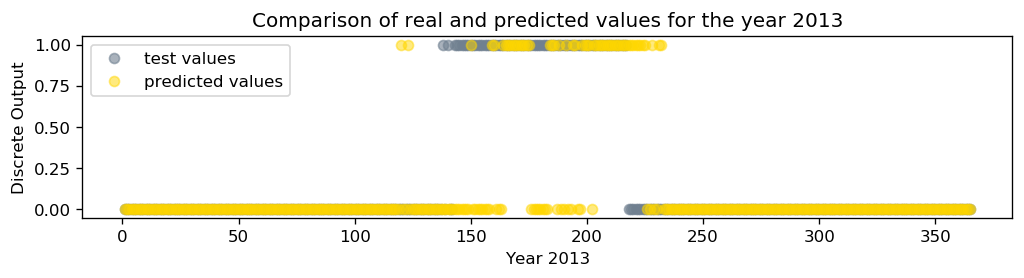

In [56]:
plt.figure(figsize=(10, 2), dpi=120)
X1 = np.linspace(1, 365, 365, endpoint=True)
plt.plot(X1, list(Y13), color='slategray', marker='o', linestyle='None', alpha=0.6, label="test values")
plt.plot(X1, predictY_list[0], color='gold', marker='o', linestyle='None', alpha=0.5, label="predicted values")
plt.xlabel('Year 2013')
plt.ylabel('Discrete Output')
plt.title('Comparison of real and predicted values for the year 2013')
plt.legend(loc='upper left')
plt.savefig("Comparison of real and predicted values for the year 2013.png", dpi=120)
plt.show()

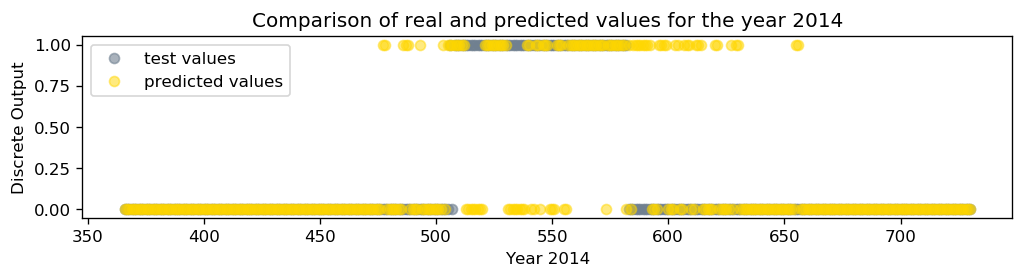

In [57]:
plt.figure(figsize=(10, 2), dpi=120)
X2 = np.linspace(366, 730, 365, endpoint=True)
plt.plot(X2, list(Y14), color='slategray', marker='o', linestyle='None', alpha=0.6, label="test values")
plt.plot(X2, predictY_list[1], color='gold', marker='o', linestyle='None', alpha=0.5, label="predicted values")
plt.xlabel('Year 2014')
plt.ylabel('Discrete Output')
plt.title('Comparison of real and predicted values for the year 2014')
plt.legend(loc='upper left')
plt.savefig("Comparison of real and predicted values for the year 2014.png", dpi=120)
plt.show()

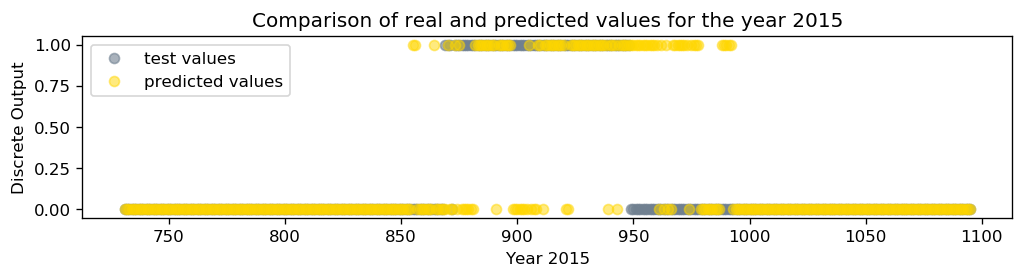

In [58]:
plt.figure(figsize=(10, 2), dpi=120)
X3 = np.linspace(731, 1095, 365, endpoint=True)
plt.plot(X3, list(Y15), color='slategray', marker='o', linestyle='None', alpha=0.6, label="test values")
plt.plot(X3, predictY_list[2], color='gold', marker='o', linestyle='None', alpha=0.5, label="predicted values")
plt.xlabel('Year 2015')
plt.ylabel('Discrete Output')
plt.title('Comparison of real and predicted values for the year 2015')
plt.legend(loc='upper left')
plt.savefig("Comparison of real and predicted values for the year 2015.png", dpi=120)
plt.show()

In [59]:
array = list(predictY_list[0])
array.extend(predictY_list[1])
array.extend(predictY_list[2])

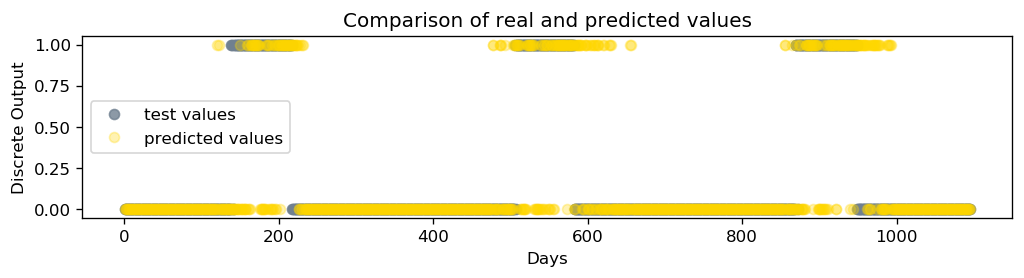

In [60]:
plt.figure(figsize=(10, 2), dpi=120)
X_all = np.linspace(1, 1095, 1095, endpoint=True)
plt.plot(X_all, list(Y), color='slategray', marker='o', linestyle='None', alpha=0.8, label="test values")
plt.plot(X_all, array, color='gold', marker='o', linestyle='None', alpha=0.3, label="predicted values")
plt.xlabel('Days')
plt.ylabel('Discrete Output')
plt.title('Comparison of real and predicted values')
plt.legend(loc='center left')
plt.savefig("Comparison of real and predicted values.png", dpi=120)
plt.show()